# **Understanding Seoul's Bike Sharing System: EDA and Modeling by Machine Learning Approaches**

# Group 2 (Members and Contributions)
*   **James Daniel Cudo**
*   **Cecil Chloe Ortega**
*   **Kean Ivan Suaybaguio**
*   **Eula Kathrina Tizon**

## Parts
* Data Preprocessing & EDA
* PCA & Cluster Analysis
* Modeling (Linear Regression, kNN)
* Advanced Modeling (Random Forest, XGBoost Regressor)
* More analyses and interpretations can be found in the technical report

## Importing Libraries and Loading the Dataset

We start by importing the necessary libraries and downloading the dataset from Google Drive to prepare for data analysis.

In [ ]:
import gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from scipy import stats

In [ ]:
file_id = '1VVA1wB7Ltt8_cbysYYT2e9A5FJwDm_lt'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'seoulbikedata.csv'
gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1VVA1wB7Ltt8_cbysYYT2e9A5FJwDm_lt
From (redirected): https://drive.google.com/uc?id=1VVA1wB7Ltt8_cbysYYT2e9A5FJwDm_lt&confirm=t&uuid=90028b01-79aa-4b30-bfd1-4e861cc0367f
To: /content/seoulbikedata.csv
100%|██████████| 1.32G/1.32G [00:20<00:00, 64.6MB/s]


'seoulbikedata.csv'

Next, we load the dataset into a pandas DataFrame to facilitate easy data manipulation and analysis.

In [ ]:
df_orig = pd.read_csv(output)
df_orig.shape

(9601139, 26)

Since the dataset is too large, we will randomly sample 1% of the data and use only this sample for analysis.

In [ ]:
df = df_orig.sample(frac=0.01, random_state=42)
df.shape

(96011, 26)

We adjust the display settings to show all columns, ensuring we do not miss any important information in the dataset.

In [ ]:
pd.set_option('display.max_columns',200)

We use the `head` method to quickly preview the first few rows and understand the structure and content of the dataset.

In [ ]:
df.head()

,Unnamed: 0,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
7575138,7773438,40,5060,37.556610,126.898018,37.573112,126.922447,2.828991,10,16,22,18,1,10,16,22,59,1,13.6,0.0,0.6,71.0,0.00,0.0,10.9,11.0
730271,744376,4,800,37.552746,126.918617,37.557499,126.923805,0.698910,3,30,19,47,4,3,30,19,52,4,15.2,0.0,3.2,60.0,0.09,0.0,14.2,32.0
5296864,5430397,71,17170,37.521282,126.973465,37.521282,126.973465,0.000000,8,25,20,36,5,8,25,21,48,5,24.6,0.0,2.9,65.0,0.00,0.0,22.2,11.0
6836061,7013746,14,2800,37.473728,126.918404,37.481602,126.892799,2.423180,10,1,8,10,0,10,1,8,26,0,13.7,0.0,2.4,54.0,0.39,0.0,15.1,18.0
6092272,6247205,11,3020,37.602627,127.041634,37.596020,127.059830,1.763386,9,14,14,22,4,9,14,14,34,4,26.3,0.0,1.5,58.0,1.37,0.0,33.1,19.0


## Data Cleaning and Preprocessing

Let us first check the shape of our df before any preprocessing.

In [ ]:
df.shape

(96011, 26)

We list the column names of the DataFrame to get an overview of the variables we will be working with.

In [ ]:
df.columns

Index(['Unnamed: 0', 'Duration', 'Distance', 'PLong', 'PLatd', 'DLong',
       'DLatd', 'Haversine', 'Pmonth', 'Pday', 'Phour', 'Pmin', 'PDweek',
       'Dmonth', 'Dday', 'Dhour', 'Dmin', 'DDweek', 'Temp', 'Precip', 'Wind',
       'Humid', 'Solar', 'Snow', 'GroundTemp', 'Dust'],
      dtype='object')

We drop the 'Unnamed: 0' column, which is likely an index column from the original CSV file and not needed for our analysis.

In [ ]:
df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

We check for missing values to identify any gaps in the data that need to be addressed during preprocessing. Based on the output below, there are no null values in the data.

In [ ]:
df.isnull().sum()

,0
Duration,0
Distance,0
PLong,0
PLatd,0
DLong,0
DLatd,0
Haversine,0
Pmonth,0
Pday,0
Phour,0


We identify duplicate rows to ensure data quality and avoid redundancy in our analysis. Based on the output below, there are 5 duplicate rows in the data.

In [ ]:
# Identify duplicate rows
duplicates = df.duplicated()

# Display the rows that are duplicates
duplicate_rows = df[duplicates]
print(duplicate_rows)

# Count duplicate rows
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")

         Duration  Distance      PLong       PLatd      DLong       DLatd  \
1526167        88      7960  37.522930  126.961693  37.522930  126.961693   
1525973         8      1430  37.501652  127.128181  37.501652  127.128181   
7226864       117     19290  37.506199  127.003944  37.506199  127.003944   
2844548         9      1480  37.548908  126.836563  37.548908  126.836563   
6488288        13      1180  37.506748  127.098831  37.506748  127.098831   

         Haversine  Pmonth  Pday  Phour  Pmin  PDweek  Dmonth  Dday  Dhour  \
1526167        0.0       5     5     17     8       5       5     5     17   
1525973        0.0       5     5     17     6       5       5     5     17   
7226864        0.0      10     9     16    28       1      10     9     16   
2844548        0.0       6    15     18    47       4       6    15     18   
6488288        0.0       9    24     18    13       0       9    24     18   

         Dmin  DDweek  Temp  Precip  Wind  Humid  Solar  Snow  Groun

To avoid redundancy in our analysis, we drop duplicate rows that are identical in all columns.

In [ ]:
df = df.drop_duplicates()

We use the `info` method to get detailed information about the data types of the variables. Based on the output below, there are no categorical variables in the data, and all variables are in the expected data type to be used.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96006 entries, 7575138 to 275008
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Duration    96006 non-null  int64  
 1   Distance    96006 non-null  int64  
 2   PLong       96006 non-null  float64
 3   PLatd       96006 non-null  float64
 4   DLong       96006 non-null  float64
 5   DLatd       96006 non-null  float64
 6   Haversine   96006 non-null  float64
 7   Pmonth      96006 non-null  int64  
 8   Pday        96006 non-null  int64  
 9   Phour       96006 non-null  int64  
 10  Pmin        96006 non-null  int64  
 11  PDweek      96006 non-null  int64  
 12  Dmonth      96006 non-null  int64  
 13  Dday        96006 non-null  int64  
 14  Dhour       96006 non-null  int64  
 15  Dmin        96006 non-null  int64  
 16  DDweek      96006 non-null  int64  
 17  Temp        96006 non-null  float64
 18  Precip      96006 non-null  float64
 19  Wind        96006 non-n

We use the `describe` method to obtain summary statistics, which provide insights into the distribution and spread of the data.

In [ ]:
df.describe()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
count,96006.000000,96006.000000,96006.000000,96006.000000,96006.000000,96006.000000,96006.000000,96006.000000,96006.000000,96006.000000,96006.000000,96006.000000,96006.000000,96006.000000,96006.000000,96006.000000,96006.000000,96006.000000,96006.000000,96006.000000,96006.000000,96006.000000,96006.000000,96006.000000,96006.000000
mean,25.684145,3691.611983,37.547676,126.990839,37.547795,126.990737,1.867548,7.575881,15.762286,14.362863,29.063809,2.940962,7.576120,15.763150,14.411433,30.044903,2.943326,18.569324,0.018549,1.819996,53.987334,0.732342,0.009892,20.758725,32.431973
std,24.926534,3926.300130,0.044497,0.082506,0.044556,0.083293,1.985154,2.693191,8.775516,6.251893,17.239282,1.976033,2.693168,8.775203,6.481697,17.334091,1.977891,9.481443,0.375430,0.972398,17.435562,0.919566,0.160972,12.659081,24.006996
min,1.000000,1.000000,37.437271,126.798599,37.437271,126.798599,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-17.800000,0.000000,0.000000,10.000000,0.000000,0.000000,-13.600000,0.000000
25%,8.000000,1230.000000,37.514240,126.920036,37.514240,126.919579,0.676832,6.000000,8.000000,10.000000,14.000000,1.000000,6.000000,8.000000,10.000000,15.000000,1.000000,12.200000,0.000000,1.100000,41.000000,0.000000,0.000000,11.600000,16.000000
50%,16.000000,2280.000000,37.547070,126.994682,37.546848,126.994682,1.258996,8.000000,16.000000,16.000000,29.000000,3.000000,8.000000,16.000000,16.000000,30.000000,3.000000,20.100000,0.000000,1.700000,53.000000,0.280000,0.000000,21.200000,27.000000
75%,36.000000,4610.000000,37.573277,127.061897,37.573307,127.062752,2.363338,10.000000,23.000000,19.000000,44.000000,5.000000,10.000000,23.000000,19.000000,45.000000,5.000000,25.500000,0.000000,2.400000,67.000000,1.260000,0.000000,28.600000,42.000000
max,119.000000,33220.000000,37.689720,127.180267,37.689720,127.180267,22.782955,12.000000,31.000000,23.000000,59.000000,6.000000,12.000000,31.000000,23.000000,59.000000,6.000000,39.400000,35.000000,7.400000,98.000000,3.520000,8.800000,62.200000,304.000000


Based on the output above, we need to investigate the occurrence of zero haversine values. We filter the rows where the haversine is zero and pick-up and drop-off details are identical, as these indicate that the bike has not moved at all. These may also be data errors or anomalies.

In [ ]:
filtered_df = df.loc[(df['Haversine'] == 0) &
                      (df['PLong'] == df['DLong']) &
                      (df['PLatd'] == df['DLatd']) &
                      (df['Pmonth'] == df['Dmonth']) &
                      (df['Pday'] == df['Dday']) &
                      (df['Phour'] == df['Dhour']) &
                      (df['Pmin'] == df['Dmin']) &
                      (df['PDweek'] == df['DDweek'])]

We print the filtered DataFrame to closely examine these rows and decide on the appropriate action to take.

In [ ]:
filtered_df

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
2845023,15,2290,37.638805,127.028358,37.638805,127.028358,0.0,6,15,18,50,4,6,15,18,50,4,25.9,0.0,1.5,44.0,1.36,0.0,26.5,7.0
7225408,39,1470,37.569805,127.016953,37.569805,127.016953,0.0,10,9,16,27,1,10,9,16,27,1,19.0,0.0,1.4,39.0,0.89,0.0,19.6,28.0
825888,31,5510,37.565205,127.041847,37.565205,127.041847,0.0,4,3,19,11,1,4,3,19,11,1,18.0,0.0,3.1,74.0,0.02,0.0,16.6,66.0
6488254,46,2740,37.514240,127.123070,37.514240,127.123070,0.0,9,24,18,13,0,9,24,18,13,0,20.3,0.0,2.4,35.0,0.46,0.0,19.7,17.0
1587851,79,15690,37.500614,126.986160,37.500614,126.986160,0.0,5,7,19,40,0,5,7,19,40,0,23.5,0.0,1.5,48.0,0.40,0.0,18.0,61.0
7225987,117,19290,37.506199,127.003944,37.506199,127.003944,0.0,10,9,16,28,1,10,9,16,28,1,19.0,0.0,1.4,39.0,0.89,0.0,19.6,28.0
5532093,38,9330,37.591534,127.067741,37.591534,127.067741,0.0,9,2,20,7,6,9,2,20,7,6,26.9,0.0,1.6,56.0,0.00,0.0,26.5,16.0
1526172,88,7960,37.522930,126.961693,37.522930,126.961693,0.0,5,5,17,8,5,5,5,17,8,5,23.6,0.0,3.9,29.0,1.68,0.0,30.0,40.0
1111625,4,890,37.613956,127.030251,37.613956,127.030251,0.0,4,19,2,1,3,4,19,2,1,3,8.8,0.0,0.7,49.0,0.00,0.0,4.8,80.0
1526314,47,860,37.591614,127.045792,37.591614,127.045792,0.0,5,5,17,8,5,5,5,17,8,5,23.6,0.0,3.9,29.0,1.68,0.0,30.0,40.0


We drop these identified rows from the DataFrame to remove potential data issues and ensure accurate analysis.

In [ ]:
df = df.drop(filtered_df.index)

We now recheck the DataFrame for zero-haversine rows. Based on the output  below, the remaining rows do not have the same pick-up and drop-off times. It is possible that these bike users made a roundtrip or dropped the bike at the same pickup point after using it. We do not remove these rows anymore, as all problematic data points have been addressed.

In [ ]:
df[df['Haversine']==0]

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
5296864,71,17170,37.521282,126.973465,37.521282,126.973465,0.0,8,25,20,36,5,8,25,21,48,5,24.6,0.0,2.9,65.0,0.00,0.0,22.2,11.0
6092442,48,5560,37.542816,127.042084,37.542816,127.042084,0.0,9,14,13,51,4,9,14,14,40,4,26.4,0.0,1.2,57.0,1.80,0.0,35.9,11.0
5657398,110,11390,37.476891,126.980576,37.476891,126.980576,0.0,9,5,21,21,2,9,5,23,12,2,23.9,0.0,2.3,75.0,0.00,0.0,22.2,31.0
4084812,12,1040,37.568878,126.977470,37.568878,126.977470,0.0,7,20,7,16,4,7,20,7,28,4,25.2,0.0,0.6,75.0,0.34,0.0,25.2,29.0
522248,50,4290,37.516598,127.009590,37.516598,127.009590,0.0,3,17,11,28,5,3,17,12,22,5,8.0,0.0,1.2,39.0,2.26,0.0,15.7,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2145184,3,110,37.521282,126.973465,37.521282,126.973465,0.0,5,27,12,0,6,5,27,12,4,6,23.4,0.0,2.8,38.0,1.87,0.0,35.5,79.0
7360056,52,7750,37.486225,126.935829,37.486225,126.935829,0.0,10,12,14,5,4,10,12,14,57,4,16.5,0.0,1.4,32.0,2.43,0.0,26.8,23.0
3463717,52,11510,37.509380,126.963615,37.509380,126.963615,0.0,7,3,19,36,1,7,3,20,29,1,30.4,0.1,0.9,62.0,0.65,0.0,28.3,10.0
7818605,9,910,37.481537,127.122124,37.481537,127.122124,0.0,10,22,1,47,0,10,22,1,57,0,10.7,0.0,0.9,57.0,0.00,0.0,8.7,29.0


We check the shape of the DataFrame to confirm the removal of unnecessary rows and columns and verify the remaining structure.

In [ ]:
df.shape

(95949, 25)

## Exploratory Data Analysis

We create a heatmap of the correlation matrix to understand how different variables in the dataset are related to each other.

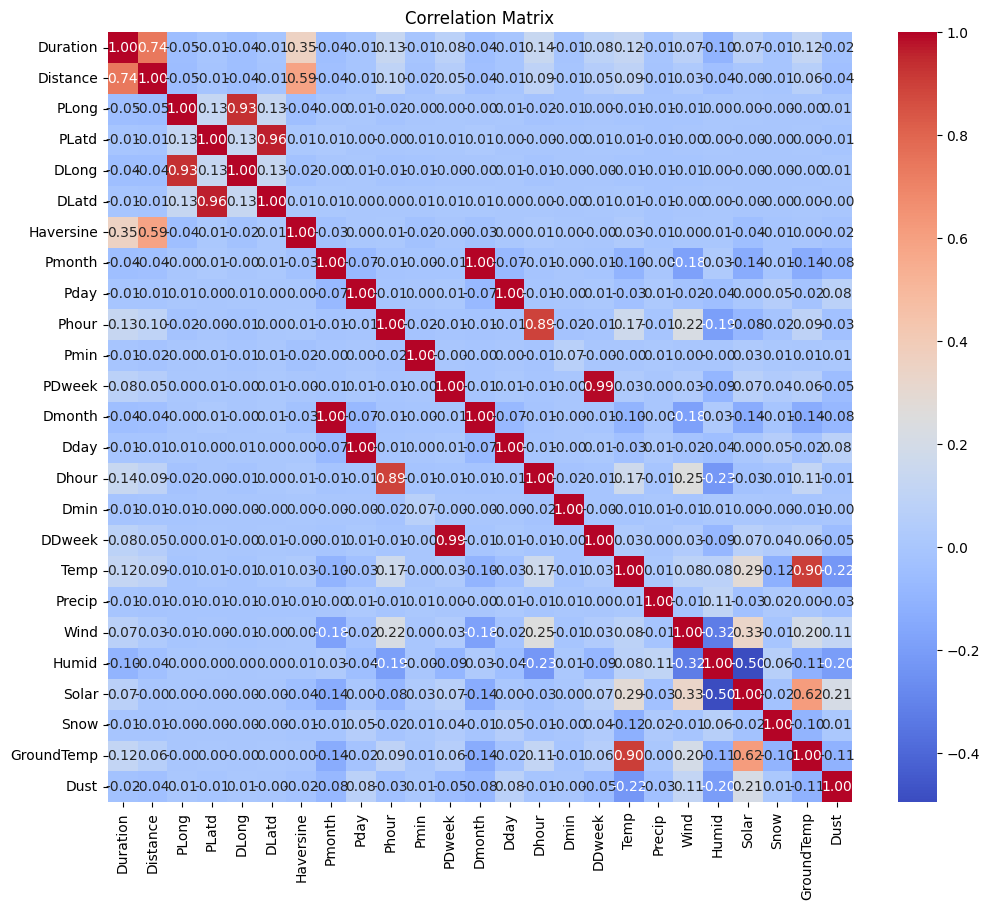

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### Histograms of Variables

We plot the distribution of the 'Duration' variable to visualize how bike trip durations are distributed.

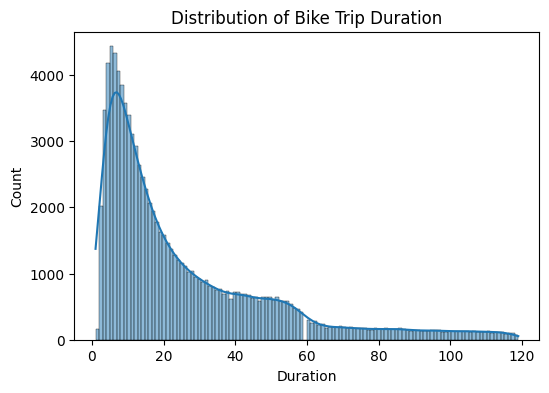

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df['Duration'], kde=True, bins=120)
plt.title('Distribution of Bike Trip Duration')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.show()

We plot the distribution of the 'Distance' variable to visualize how bike trip distances are distributed.

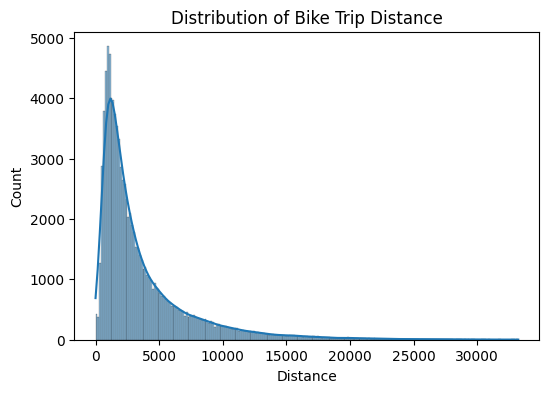

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df['Distance'], kde=True)
plt.title('Distribution of Bike Trip Distance')
plt.xlabel('Distance')
plt.ylabel('Count')
plt.show()

We create histograms for weather-related variables to examine their distributions and identify any notable patterns or outliers.

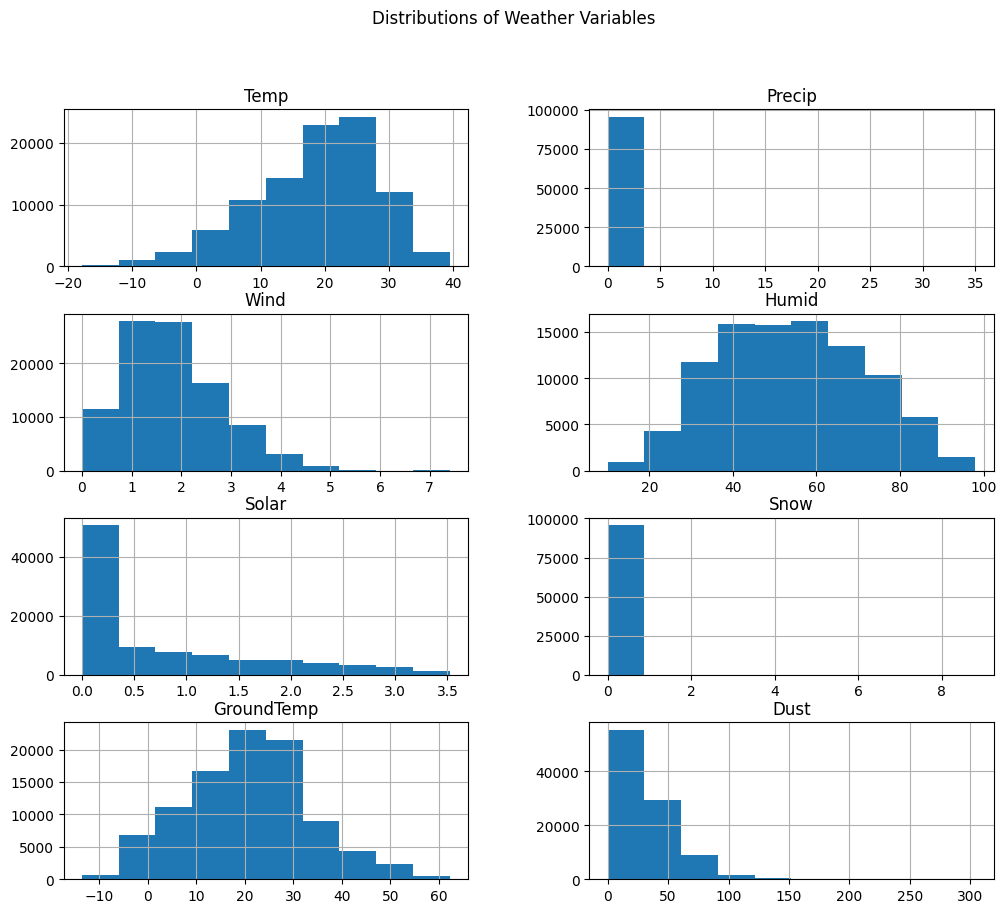

In [ ]:
weather_vars = ['Temp', 'Precip', 'Wind', 'Humid', 'Solar', 'Snow', 'GroundTemp', 'Dust']
df[weather_vars].hist(figsize=(12,10), layout=(4,2))
plt.suptitle('Distributions of Weather Variables')
plt.show()

### Visualizations by Month

We use a pivot table to count the number of pick-ups in each month, which helps us identify seasonal trends in bike usage, map numerical month values to their corresponding names to make the plots more interpretable, then create a bar plot to visualize the total number of pick-ups for each month, highlighting any seasonal patterns.

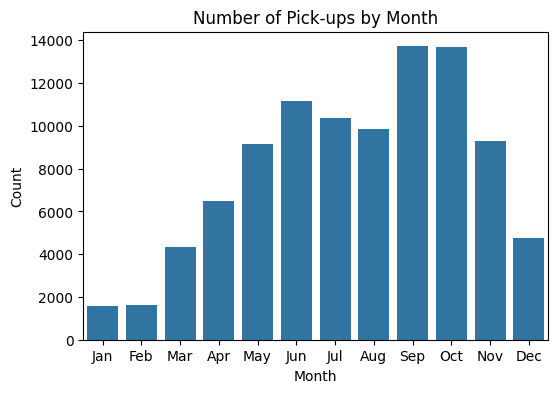

In [ ]:
pivot_table = df.pivot_table(index='Pmonth', aggfunc={'Pmonth': 'count'})

month_map = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
pivot_table.index = pivot_table.index.map(month_map)

pick_up_months = pivot_table.index.to_numpy()
trips_count = pivot_table['Pmonth'].to_numpy()

plt.figure(figsize=(6,4))
sns.barplot(x=pick_up_months,y=trips_count)
plt.xlabel("Month")
plt.ylabel("Count")
plt.title("Number of Pick-ups by Month")
plt.show()

We calculate the average trip duration for each month and plot it to observe how trip durations vary throughout the year.

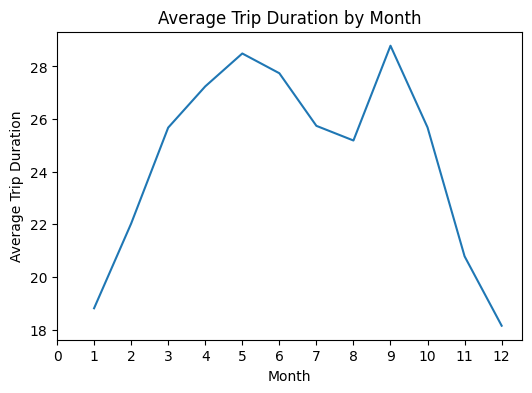

In [ ]:
df_avg_duration_by_month = df.groupby(['Pmonth'])['Duration'].mean()

plt.figure(figsize=(6,4))
plt.plot(df_avg_duration_by_month.index, df_avg_duration_by_month.values)
plt.xlabel('Month')
plt.xticks(range(len(df_avg_duration_by_month.index)+1))
plt.ylabel('Average Trip Duration')
plt.title('Average Trip Duration by Month')
plt.show()

We define a function to map months to their respective seasons, which allows us to analyze bike usage patterns by season, apply the month-to-season mapping function to the DataFrame, creating a new column that categorizes each trip by season, then create a bar plot to show the total number of trips for each season, helping us understand how bike usage changes with seasons.


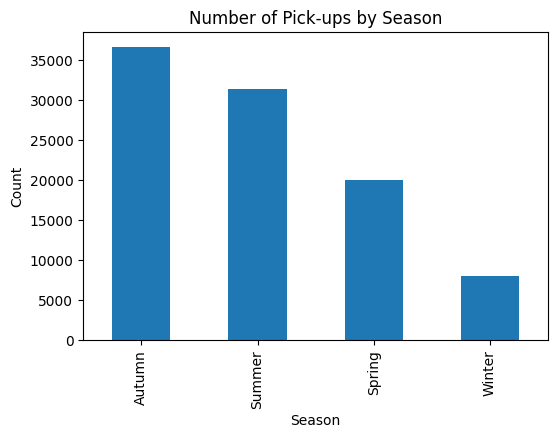

In [ ]:
def map_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'

df_with_seasons = df.copy()
df_with_seasons['Season'] = df_seasons = df['Pmonth'].apply(map_season)

season_counts = df_seasons.value_counts()

plt.figure(figsize=(6,4))
season_counts.plot(kind='bar')
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Number of Pick-ups by Season')
plt.show()

We create a box plot to visualize the distribution of trip durations for each season, providing insights into seasonal variations.

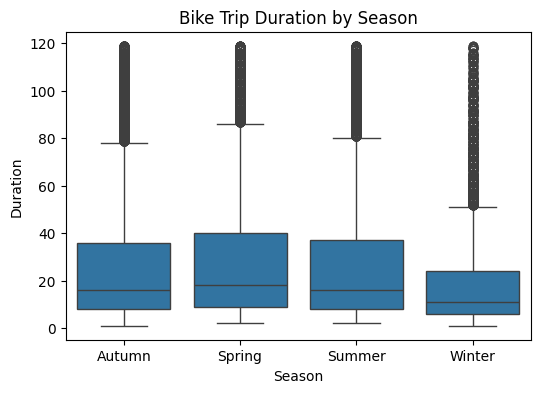

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Season', y='Duration', data=df_with_seasons)
plt.title('Bike Trip Duration by Season')
plt.xlabel('Season')
plt.ylabel('Duration')
plt.show()

### Visualizations by Day of Week

We use a pivot table to count the number of pick-ups for each day of the week, helping us identify weekly usage patterns, map numerical day values to their corresponding names to make the plots more interpretable, then create a bar plot to visualize the total number of pick-ups for each day of the week, highlighting any weekly patterns.


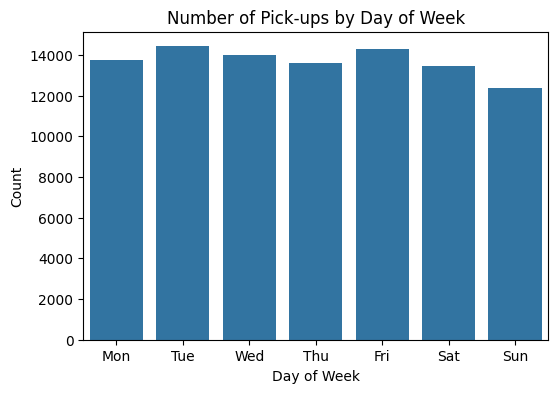

In [ ]:
pivot_table = df.pivot_table(index='PDweek', aggfunc={'PDweek': 'count'})

dweek_map = {0: 'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
pivot_table.index = pivot_table.index.map(dweek_map)

pick_up_dweek = pivot_table.index.to_numpy()
trips_count = pivot_table['PDweek'].to_numpy()

plt.figure(figsize=(6,4))
sns.barplot(x=pick_up_dweek,y=trips_count)
plt.xlabel("Day of Week")
plt.ylabel("Count")
plt.title("Number of Pick-ups by Day of Week")
plt.show()

We calculate the average trip duration for each day of the week and plot it to observe how trip durations vary across the week.

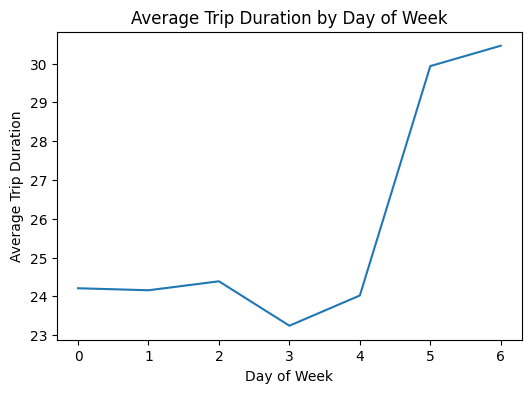

In [ ]:
df_avg_duration_by_day_of_week = df.groupby(['PDweek'])['Duration'].mean()

plt.figure(figsize=(6,4))
plt.plot(df_avg_duration_by_day_of_week.index, df_avg_duration_by_day_of_week.values)
plt.xlabel('Day of Week')
plt.xticks(range(len(df_avg_duration_by_day_of_week.index)))
plt.ylabel('Average Trip Duration')
plt.title('Average Trip Duration by Day of Week')
plt.show()

### Visualizations by Time of Day

We use a pivot table to count the number of pick-ups for each hour of the day, helping us identify hourly usage patterns, create a bar plot to visualize the total number of pick-ups for each hour, highlighting any hourly patterns.

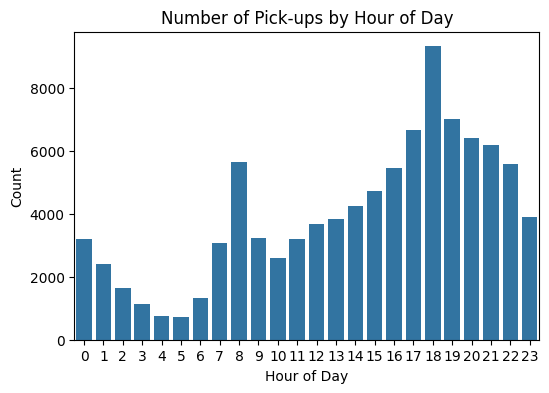

In [ ]:
pivot_table = df.pivot_table(index='Phour', aggfunc={'Phour': 'count'})

pick_up_hour = pivot_table.index.to_numpy()
trips_count = pivot_table['Phour'].to_numpy()

plt.figure(figsize=(6,4))
sns.barplot(x=pick_up_hour,y=trips_count)
plt.xlabel("Hour of Day")
plt.ylabel("Count")
plt.title("Number of Pick-ups by Hour of Day")
plt.show()

We calculate the average trip duration for each hour and plot it to observe how trip durations vary throughout the day.

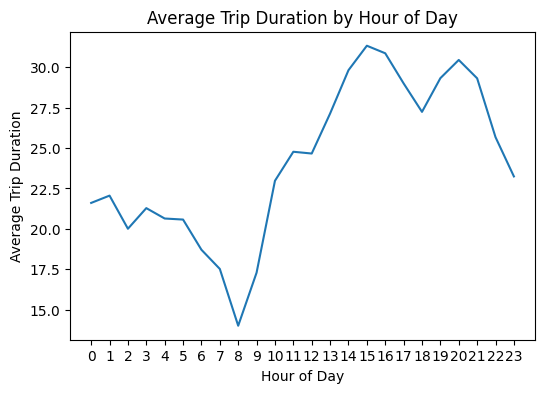

In [ ]:
df_avg_duration_by_hour_of_day = df.groupby(['Phour'])['Duration'].mean()

plt.figure(figsize=(6,4))
plt.plot(df_avg_duration_by_hour_of_day.index, df_avg_duration_by_hour_of_day.values)
plt.xlabel('Hour of Day')
plt.xticks(range(len(df_avg_duration_by_hour_of_day.index)))
plt.ylabel('Average Trip Duration')
plt.title('Average Trip Duration by Hour of Day')
plt.show()

We create a new column that categorizes each trip based on the hour of the day, grouping them into 'Night', 'Morning', 'Afternoon', and 'Evening', then create a bar plot to show the distribution of rides across different times of the day, helping us understand time-based usage patterns.

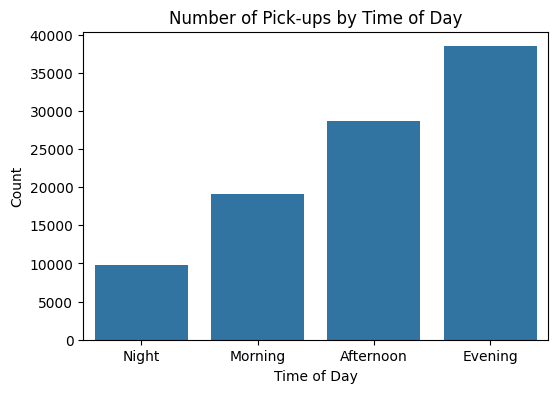

In [ ]:
df_with_time_of_day = df.copy()
df_with_time_of_day['Time_of_Day'] = pd.cut(df['Phour'], bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'], right=False)

plt.figure(figsize=(6,4))
sns.countplot(x='Time_of_Day', data=df_with_time_of_day)
plt.title('Number of Pick-ups by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Count')
plt.show()

We create a box plot to visualize the distribution of trip durations for each time of day, providing insights into time of day variations.

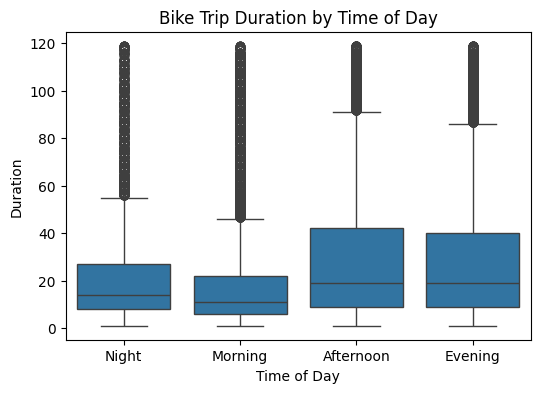

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Time_of_Day', y='Duration', data=df_with_time_of_day)
plt.title('Bike Trip Duration by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Duration')
plt.show()

### Geographic Distributions

We create a scatter plot of pick-up locations based on longitude and latitude to understand the geographic distribution of trip origins.


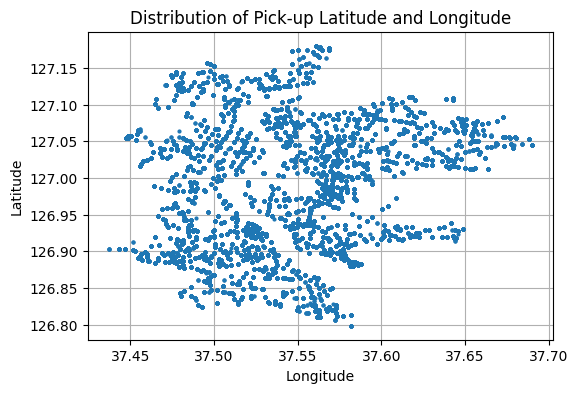

In [ ]:
plt.rcParams['agg.path.chunksize'] = 10000
plt.figure(figsize=(6,4))
plt.plot(df['PLong'], df['PLatd'], markersize=2, linestyle='None', marker='o')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Distribution of Pick-up Latitude and Longitude')
plt.grid(True)
plt.show()

We create a scatter plot of drop-off locations based on longitude and latitude to understand the geographic distribution of trip destinations.


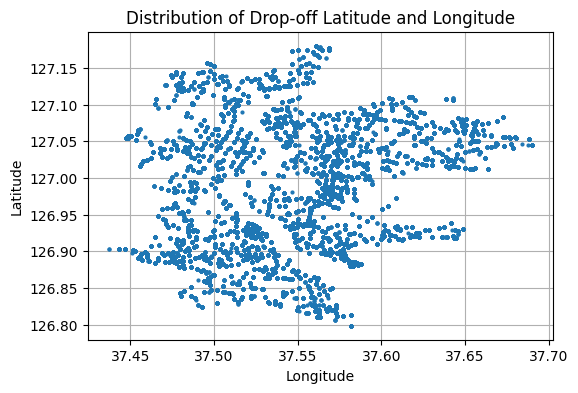

In [ ]:
plt.rcParams['agg.path.chunksize'] = 10000
plt.figure(figsize=(6,4))
plt.plot(df['DLong'], df['DLatd'], markersize=2, linestyle='None', marker='o')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Distribution of Drop-off Latitude and Longitude')
plt.grid(True)
plt.show()

### Outlier Detection

To ensure the accuracy of our analysis and predictions, it's crucial to identify and handle outliers in the 'Duration' and 'Distance' columns, the variables with large ranges and are highly skewed. Outliers can significantly skew results, leading to misleading insights and reduced model performance. By detecting these anomalies, we can understand their impact and decide on appropriate actions to clean and prepare the data for more reliable analysis. We will use the Z-score method to identify outliers in these column before applying any transformations, and then examine their extent and effect.

Let us first look at the box plots of Duration and of Distance.

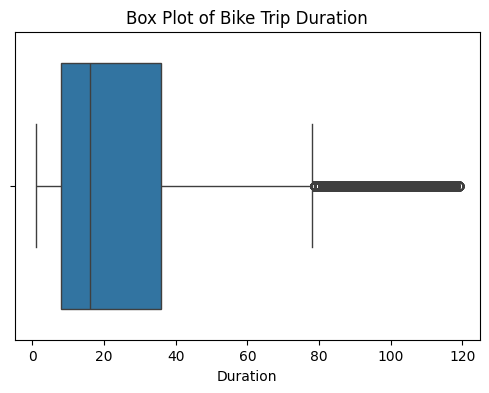

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Duration'])
plt.title('Box Plot of Bike Trip Duration')
plt.show()

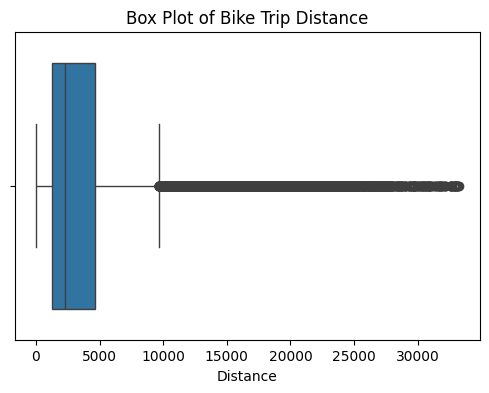

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Distance'])
plt.title('Box Plot of Bike Trip Distance')
plt.show()

First, we identify outliers in the 'Duration' column using the Z-score method before applying any transformations. We will then count and display these outliers to understand their extent.

In [ ]:
import scipy.stats as stats

# Detect Outliers Before Transformation for 'Duration'
df['Duration_Z_Score_Before'] = stats.zscore(df['Duration'])
outliers_duration_before = df[df['Duration_Z_Score_Before'].abs() > 3]

# Count outliers before transformation for 'Duration'
num_outliers_duration_before = outliers_duration_before.shape[0]
print(f'Number of outliers in Duration before transformation: {num_outliers_duration_before}')
print("Outliers in Duration before transformation:")
print(outliers_duration_before)

# Detect Outliers Before Transformation for 'Distance'
df['Distance_Z_Score_Before'] = stats.zscore(df['Distance'])
outliers_distance_before = df[df['Distance_Z_Score_Before'].abs() > 3]

# Count outliers before transformation for 'Distance'
num_outliers_distance_before = outliers_distance_before.shape[0]
print(f'Number of outliers in Distance before transformation: {num_outliers_distance_before}')
print("Outliers in Distance before transformation:")
outliers_distance_before

Number of outliers in Duration before transformation: 2249
Outliers in Duration before transformation:
         Duration  Distance      PLong       PLatd      DLong       DLatd  \
5173667       104     23690  37.594330  126.947388  37.591160  126.941330   
5657398       110     11390  37.476891  126.980576  37.476891  126.980576   
2213422       106     10340  37.542053  127.020401  37.542053  127.020401   
1365717       111     20520  37.565659  127.084297  37.565659  127.084297   
2056489       105     17410  37.538460  126.894508  37.526989  126.932098   
...           ...       ...        ...         ...        ...         ...   
2547825       106     22160  37.520336  126.994263  37.520336  126.994263   
8451160       115      1050  37.560356  127.041397  37.560356  127.041397   
2620205       101     11120  37.509720  126.890099  37.509720  126.890099   
1392323       117      4800  37.496498  126.863098  37.496498  126.863098   
8577915       117       990  37.605881  127.100632

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust,Duration_Z_Score_Before,Distance_Z_Score_Before
5296864,71,17170,37.521282,126.973465,37.521282,126.973465,0.000000,8,25,20,36,5,8,25,21,48,5,24.6,0.0,2.9,65.0,0.00,0.0,22.2,11.0,1.818904,3.433810
5173667,104,23690,37.594330,126.947388,37.591160,126.941330,0.639642,8,21,20,3,1,8,21,21,47,1,27.7,0.0,1.6,69.0,0.01,0.0,24.8,26.0,3.143148,5.094715
1365717,111,20520,37.565659,127.084297,37.565659,127.084297,0.000000,4,29,17,21,6,4,29,19,12,6,21.9,0.0,3.1,28.0,1.60,0.0,29.0,61.0,3.424048,4.287189
2056489,105,17410,37.538460,126.894508,37.526989,126.932098,3.551573,5,24,19,35,3,5,24,21,20,3,21.1,0.0,2.6,44.0,0.41,0.0,21.5,108.0,3.183276,3.494948
3021661,107,18630,37.488453,126.974213,37.488556,126.982574,0.737785,6,19,22,0,1,6,19,23,48,1,20.8,0.0,2.1,71.0,0.00,0.0,20.4,35.0,3.263534,3.805731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8258964,67,15580,37.562134,126.969254,37.534389,126.869598,9.311596,11,2,18,17,4,11,2,19,24,4,14.6,0.0,1.4,42.0,0.02,0.0,10.1,39.0,1.658389,3.028773
7476138,90,28480,37.489750,126.927467,37.620369,127.083641,20.012073,10,14,20,27,6,10,14,21,58,6,14.4,0.0,2.3,61.0,0.00,0.0,12.4,13.0,2.581347,6.314920
2259165,118,18760,37.535969,127.094673,37.546547,127.106133,1.550620,5,30,17,35,2,5,30,19,35,2,24.1,0.0,2.2,41.0,1.90,0.0,38.3,53.0,3.704948,3.838847
2547825,106,22160,37.520336,126.994263,37.520336,126.994263,0.000000,6,6,20,22,2,6,6,22,9,2,23.4,0.0,1.8,64.0,0.07,0.0,22.4,32.0,3.223405,4.704963


Next, we apply a transformation to the 'Duration' column to reduce the influence of outliers. In this case, we use the logarithmic transformation. After transforming the 'Duration' column, we re-calculate the Z-scores to detect any remaining outliers. This helps us see if the transformation has mitigated the effect of extreme values. Based on the output, there are no more outliers in the variable 'Duration' after log transformation.

In [ ]:
# Apply Transformation to 'Duration'
df['Duration_Transformed'] = df['Duration'].apply(lambda x: np.log(x + 1))

# Detect Outliers After Transformation for 'Duration'
df['Duration_Z_Score_After'] = stats.zscore(df['Duration_Transformed'])
outliers_duration_after = df[df['Duration_Z_Score_After'].abs() > 3]

# Count outliers after transformation for 'Duration'
num_outliers_duration_after = outliers_duration_after.shape[0]
print(f'Number of outliers in Duration after transformation: {num_outliers_duration_after}')
print("Outliers in Duration after transformation:")
outliers_duration_after

Number of outliers in Duration after transformation: 0
Outliers in Duration after transformation:


,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust,Duration_Z_Score_Before,Distance_Z_Score_Before,Duration_Transformed,Duration_Z_Score_After


We also apply a transformation to the 'Distance' column to reduce the influence of outliers. In this case, we use the logarithmic transformation. After transforming the 'Distance' column, we re-calculate the Z-scores to detect any remaining outliers. This helps us see if the transformation has mitigated the effect of extreme values. Based on the output below, there are still a few outliers for Distance, but let us still include these in the dataset since they are already transformed.

In [ ]:
# Apply Transformation to 'Distance'
df['Distance_Transformed'] = df['Distance'].apply(lambda x: np.log(x + 1))

# Detect Outliers After Transformation for 'Distance'
df['Distance_Z_Score_After'] = stats.zscore(df['Distance_Transformed'])
outliers_distance_after = df[df['Distance_Z_Score_After'].abs() > 3]

# Count outliers after transformation for 'Distance'
num_outliers_distance_after = outliers_distance_after.shape[0]
print(f'Number of outliers in Distance after transformation: {num_outliers_distance_after}')
print("Outliers in Distance after transformation:")
outliers_distance_after

Number of outliers in Distance after transformation: 393
Outliers in Distance after transformation:


,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust,Duration_Z_Score_Before,Distance_Z_Score_Before,Duration_Transformed,Duration_Z_Score_After,Distance_Transformed,Distance_Z_Score_After
8451020,2,120,37.583698,127.053856,37.582561,127.054367,0.134208,11,7,21,11,2,11,7,21,13,2,13.5,0.0,0.8,75.0,0.00,0.0,12.3,39.0,-0.949970,-0.909508,1.098612,-1.962633,4.795791,-3.121762
6214079,3,90,37.532688,127.067497,37.531860,127.067192,0.095917,9,17,18,42,0,9,17,18,45,0,25.3,0.0,2.8,56.0,0.54,0.0,25.7,33.0,-0.909841,-0.917150,1.386294,-1.646297,4.510860,-3.420100
8895467,1,100,37.549789,127.075928,37.547070,127.074272,0.335742,11,22,10,44,3,11,22,10,46,3,2.9,0.0,2.0,22.0,1.18,0.0,0.7,14.0,-0.990099,-0.914602,0.693147,-2.408482,4.615121,-3.310933
1893409,7,60,37.562588,127.177612,37.562588,127.177612,0.000000,5,19,19,15,5,5,19,19,23,5,22.6,0.0,1.5,34.0,0.51,0.0,20.6,26.0,-0.749327,-0.924792,2.079442,-0.884112,4.110874,-3.838907
1616724,2,90,37.525650,126.887817,37.525650,126.887817,0.000000,5,8,18,6,1,5,8,18,9,1,20.7,0.0,1.4,40.0,1.06,0.0,22.9,27.0,-0.949970,-0.917150,1.098612,-1.962633,4.510860,-3.420100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6715998,18,130,37.562538,127.164528,37.562538,127.164528,0.000000,9,29,0,3,5,9,29,0,21,5,16.6,0.0,1.0,69.0,0.00,0.0,15.1,13.0,-0.307912,-0.906960,2.944439,0.067041,4.875197,-3.038619
2236799,6,10,37.501652,127.128181,37.501652,127.128181,0.000000,5,29,19,24,1,5,29,19,31,1,22.3,0.0,2.5,71.0,0.14,0.0,23.5,12.0,-0.789456,-0.937529,1.945910,-1.030943,2.397895,-5.632488
6985659,2,30,37.529770,127.074860,37.529770,127.074860,0.000000,10,3,21,19,2,10,3,21,22,2,17.6,0.0,1.6,59.0,0.00,0.0,14.7,18.0,-0.949970,-0.932434,1.098612,-1.962633,3.433987,-4.547644
2388387,3,120,37.528816,126.924530,37.528816,126.924530,0.000000,6,2,21,14,5,6,2,21,18,5,22.1,0.0,2.5,44.0,0.00,0.0,19.7,9.0,-0.909841,-0.909508,1.386294,-1.646297,4.795791,-3.121762


### Feature Transformation

For the time-related features, cyclic transformation is necessary. We do this below for each of the pick-up and drop-off time variables – hour, minute, day of week, day, and month.

In [ ]:
# Function to transform time-related features
def transform_time_features(df):
    df['Phour_sin'] = np.sin(2 * np.pi * df['Phour'] / 24)
    df['Phour_cos'] = np.cos(2 * np.pi * df['Phour'] / 24)
    df['Pmin_sin'] = np.sin(2 * np.pi * df['Pmin'] / 60)
    df['Pmin_cos'] = np.cos(2 * np.pi * df['Pmin'] / 60)
    df['PDweek_sin'] = np.sin(2 * np.pi * df['PDweek'] / 7)
    df['PDweek_cos'] = np.cos(2 * np.pi * df['PDweek'] / 7)
    df['Pmonth_sin'] = np.sin(2 * np.pi * df['Pmonth'] / 12)
    df['Pmonth_cos'] = np.cos(2 * np.pi * df['Pmonth'] / 12)
    Pdays_normalized = (df['Pday'] - 1) / 30
    df['Pday_sin'] = np.sin(2 * np.pi * Pdays_normalized)
    df['Pday_cos'] = np.cos(2 * np.pi * Pdays_normalized)
    df['Dhour_sin'] = np.sin(2 * np.pi * df['Dhour'] / 24)
    df['Dhour_cos'] = np.cos(2 * np.pi * df['Dhour'] / 24)
    df['Dmin_sin'] = np.sin(2 * np.pi * df['Dmin'] / 60)
    df['Dmin_cos'] = np.cos(2 * np.pi * df['Dmin'] / 60)
    df['DDweek_sin'] = np.sin(2 * np.pi * df['DDweek'] / 7)
    df['DDweek_cos'] = np.cos(2 * np.pi * df['DDweek'] / 7)
    df['Dmonth_sin'] = np.sin(2 * np.pi * df['Dmonth'] / 12)
    df['Dmonth_cos'] = np.cos(2 * np.pi * df['Dmonth'] / 12)
    Ddays_normalized = (df['Dday'] - 1) / 30
    df['Dday_sin'] = np.sin(2 * np.pi * Ddays_normalized)
    df['Dday_cos'] = np.cos(2 * np.pi * Ddays_normalized)
    return df

# Apply transformations to the DataFrame
df = transform_time_features(df)

## Clustering

We start by selecting and extracting the relevant features from df for clustering analysis. In this case, we chose the 8 weather-related features.

In [ ]:
# Selected features for clustering
features = ['Temp', 'Precip', 'Wind', 'Humid', 'Solar', 'Snow', 'GroundTemp', 'Dust']

# Extract the selected features from the DataFrame
X_cluster = df[features]

Standardizing the features is crucial to ensure that all features contribute equally to the distance metrics used in clustering algorithms. We use StandardScaler to scale our features:

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the selected features
X_scaled = scaler.fit_transform(X_cluster)

### Principal Component Analysis

Since there are many features we want to cluster, let us first do principal component analysis (PCA) to reduce the dimensionality, especially since there might be correlations present in the chosen weather variables. This can simplify the clustering process and make it more efficient.

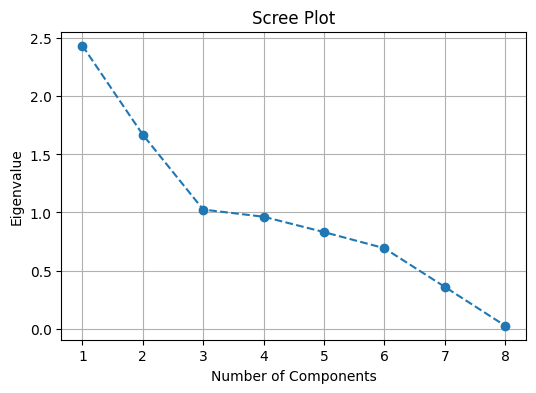

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA()
pca.fit(X_scaled)

eigenvalues = pca.explained_variance_

plt.figure(figsize=(6,4))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.xticks(range(1, len(eigenvalues) +1))
plt.grid(True)
plt.show()

Based on the scree plot above, the elbow point is at 3, meaning that there are variables fall under 3 meaningful components. We then apply PCA with 3 as the number of components.

In [ ]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

In order to better interpret the principal components, we use equamax rotation to ensure that the principal components would have a clearer separation.

In [ ]:
!pip install factor_analyzer

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from factor_analyzer import Rotator

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42565 sha256=63642b376b7e8981ed5206a5550450cf6c813db17d2b713b59266297ca7f8841
  Stored in directory: /root/.cache/pip/wheels/24/59/82/6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor_analyzer


In [ ]:
# Create a DataFrame for the PCA components
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loadings_df = pd.DataFrame(loadings, index=X_cluster.columns, columns=[f'PC{i+1}' for i in range(loadings.shape[1])])

# Apply EQUAMAX Rotation
rotator = Rotator(method='equamax')
loadings_rotated = rotator.fit_transform(loadings)

# Create a DataFrame for rotated loadings
rotated_loadings_df = pd.DataFrame(loadings_rotated, index=X_cluster.columns, columns=[f'PC{i+1}' for i in range(loadings_rotated.shape[1])])

# Display loadings
print("PCA Loadings after EQUAMAX rotation:")
rotated_loadings_df

PCA Loadings after EQUAMAX rotation:


,PC1,PC2,PC3
Temp,-0.943152,0.093982,-0.024956
Precip,-0.067245,0.106393,0.744593
Wind,-0.152251,-0.614021,0.097258
Humid,-0.013692,0.787509,0.151487
Solar,-0.491052,-0.721055,0.029121
Snow,0.159541,-0.032892,0.665650
GroundTemp,-0.961876,-0.195152,0.001667
Dust,0.322158,-0.555770,0.029373


Getting the absolute value of each loading, we can determine which component each variable loads the highest. From here, we can say that:
* Component 1 captures overall temperature variations: Temp, GroupTemp
* Component 2 captures atmospheric variables: Wind, Humid, Solar, Dust
* Component 3 captures precipitation-related variations: Precip, Snow

### K-Means Clustering

Moving on to clustering, we can apply the elbow method to determine the optimal number of clusters using the PCA-transformed data This involves fitting K-Means clustering with different values of k and calculating the Sum of Squared Errors (SSE) for each value.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

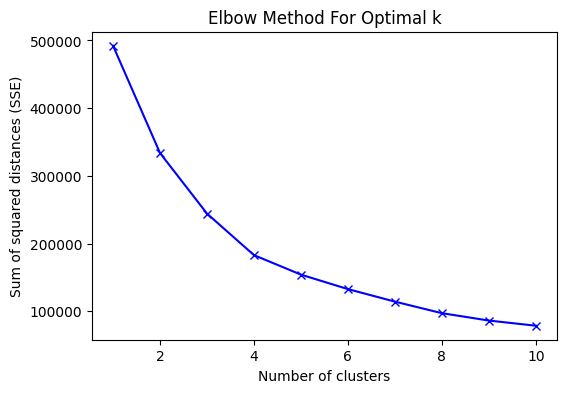

In [ ]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the Elbow Method
sse = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_pca)
    sse.append(kmeans.inertia_)

# Plot SSE for each k
plt.figure(figsize=(6,4))
plt.plot(k_range, sse, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances (SSE)')
plt.title('Elbow Method For Optimal k')
plt.show()

By the elbow method, an optimal k would be 4. We then perform K-Means clustering using k = 4. We add the resulting cluster labels to the original DataFrame.

In [ ]:
# Perform K-Means clustering
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
clusters = kmeans.fit_predict(X_pca)

# Add cluster labels to the original dataframe
df['Cluster'] = clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


We visualize the clusters using different combinations of two principal components.

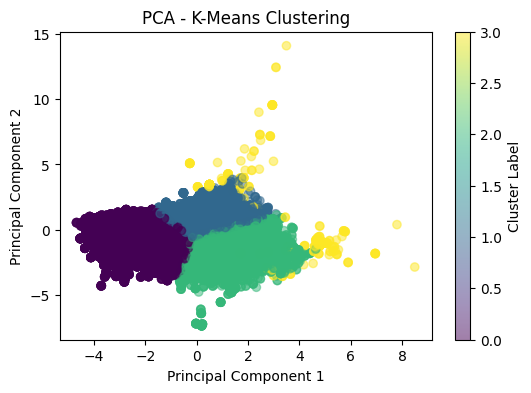

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - K-Means Clustering')
plt.colorbar(label='Cluster Label')
plt.show()

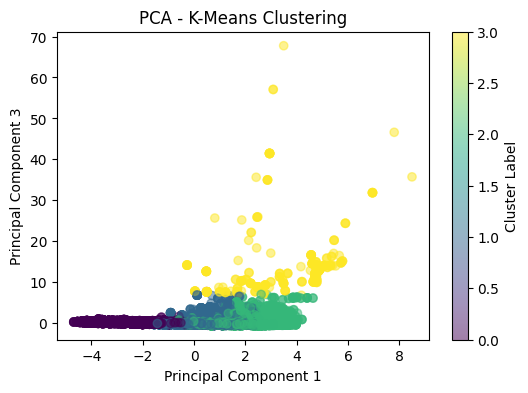

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(X_pca[:, 0], X_pca[:, 2], c=clusters, cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')
plt.title('PCA - K-Means Clustering')
plt.colorbar(label='Cluster Label')
plt.show()

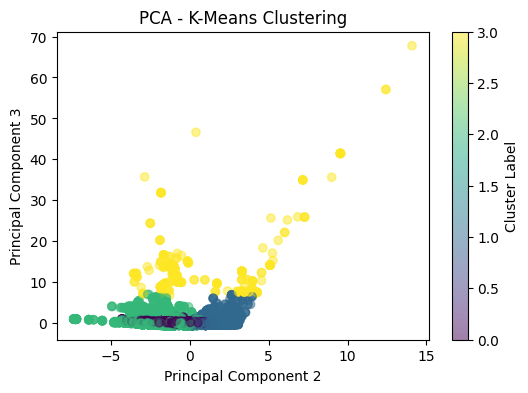

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(X_pca[:, 1], X_pca[:, 2], c=clusters, cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 3')
plt.title('PCA - K-Means Clustering')
plt.colorbar(label='Cluster Label')
plt.show()

Let us also look at the means of each cluster in terms of the weather variables they were based on.

In [ ]:
cluster_means = df.groupby('Cluster').mean()
cluster_means[features]

,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
Cluster,,,,,,,,
0,24.469346,0.000079,2.448520,41.322145,1.862027,0.000000,33.185057,39.244821
1,22.020774,0.018543,1.466228,65.111469,0.233538,0.000000,21.723663,20.176337
2,6.997298,0.000968,1.712754,49.642001,0.321540,0.012454,6.195670,44.426192
3,10.153125,3.083438,1.389687,83.325000,0.306281,1.942187,10.010938,31.184375


### DBSCAN

Another algorithm for clustering is DBSCAN.

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X_pca)

# Add cluster labels to the original DataFrame
df['DBSCAN_Cluster'] = clusters

Based on the output below, there were 59 clusters identified and 178 outliers that do not belong to any of the clusters.

In [ ]:
num_clusters = len(set(df['DBSCAN_Cluster'])) - (1 if -1 in df['DBSCAN_Cluster'].values else 0)
print(f'Number of clusters: {num_clusters}')
print(f'Number of outliers: {sum(df["DBSCAN_Cluster"] == -1)}')

Number of clusters: 59
Number of outliers: 178


## Splitting the Data

Note: Target column or variable for modeling is 'duration'.

We import libraries required for implementing machine learning models, including train-test split and evaluation metrics.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

We select relevant features from the dataset that will be used as input variables for our prediction models. For this, we will be using distance, spatial variables (latitude and longitude), temporal variables (month, day, hour, min, day of week), and weather variables (temp, precip, wind, humid, solar, groundtemp, dust), and cluster from the K-means cluster analysis. In some temporal variables, only those of the pick-up are included since they are highly correlated with the drop-off counterparts. Moreover, the clusters from the cluster analysis are included as the cluster category can capture complex patterns or relationships that might not be explicitly captured by individual weather variables.

In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target
features = ['Distance_Transformed', 'PLong', 'PLatd', 'DLong', 'DLatd',
            'Pmonth_sin', 'Pmonth_cos', 'Pday_sin', 'Pday_cos', 'Phour_sin', 'Phour_cos',
            'Pmin_sin', 'Pmin_cos', 'PDweek_sin', 'PDweek_cos', 'Dhour_sin', 'Dhour_cos', 'Dmin_sin',
            'Dmin_cos', 'Temp', 'Precip', 'Wind', 'Humid', 'Solar', 'Snow', 'GroundTemp', 'Dust', 'Cluster']
target = 'Duration_Transformed'

X = df[features]
y = df[target]

We split the data into training and testing sets to train the models on a subset of data and evaluate their performance on unseen data.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set:")
print(f"shape of X_train: {X_train.shape}")
print(f"shape of y_train: {y_train.shape}")

print("\nTesting set:")
print(f"shape of X_test: {X_test.shape}")
print(f"shape of y_test: {y_test.shape}")

Training set:
shape of X_train: (76759, 28)
shape of y_train: (76759,)

Testing set:
shape of X_test: (19190, 28)
shape of y_test: (19190,)


We preprocess the X_train and X_test data. Particularly, we use standard scaler for the numeric variables, one hot encoder for the cluster, and pass through the time variables since they have already been transformed.

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Distance_Transformed', 'PLong', 'PLatd', 'DLong', 'DLatd',
                                   'Temp', 'Precip', 'Wind', 'Humid', 'Solar', 'Snow', 'GroundTemp', 'Dust']),
        ('pass', 'passthrough', ['Pmonth_sin', 'Pmonth_cos', 'Pday_sin', 'Pday_cos', 'Phour_sin', 'Phour_cos',
                                 'Pmin_sin', 'Pmin_cos', 'PDweek_sin', 'PDweek_cos', 'Dhour_sin', 'Dhour_cos', 'Dmin_sin',
                                 'Dmin_cos']),
        ('cat', OneHotEncoder(), ['Cluster'])
    ])

# Apply the preprocessor to the training and testing data
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

## Modeling and Model Evaluation

Note:
* We use the scaled X data - X_train_scaled and X_test_scaled.

### Linear Regression

We first import necessary libraries to be used.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

We initialize the Linear Regression Model and fit the model on the scaled training data ('X_train_scaled') with the corresponding target ('y_train').

In [ ]:
lin_regr = LinearRegression()
lin_regr.fit(X_train_scaled, y_train)

LinearRegression()

The trained Linear Regression Model predicts the target values for the scaled test data.

In [ ]:
lin_y_pred = lin_regr.predict(X_test_scaled)

The model performance is evaluated by calculating the Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R-sequared metrics.

In [ ]:
lin_mse = mean_squared_error(y_test, lin_y_pred)
lin_rmse = mean_squared_error(y_test, lin_y_pred, squared=False)
lin_mae = mean_absolute_error(y_test, lin_y_pred)
lin_r2 = r2_score(y_test, lin_y_pred)

print(f'Mean Squared Error: {lin_mse}')
print(f'Root Mean Squared Error (RMSE): {lin_rmse}')
print(f'Mean Absolute Error (MAE): {lin_mae}')
print(f'R-squared: {lin_r2}')

Mean Squared Error: 0.23166823773846565
Root Mean Squared Error (RMSE): 0.4813192679900376
Mean Absolute Error (MAE): 0.3334337806340432
R-squared: 0.7210141999077957


The actual test values and the predicted values are also compared to evaluate the models performance. This is then visualized in a scatterplot, with the diagonal line representing perfect predictions for comparison.

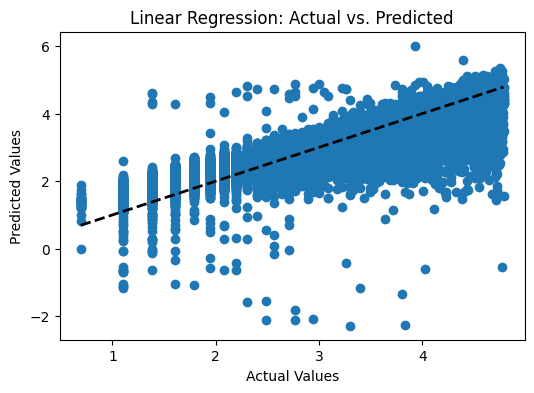

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, lin_y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

There is a significant spread of points around the line of perfect prediction or the diagonal line, which indicates that the linear regression model's predictions have considerable errors. This suggests that there are potentially non-linear relationships between the features and target variable, which cannot be fully captured by the linear model. To address this, there is a need to use more complex models that can better capture non-linear relationships.

We can further detect non-linearity through the use of a residual plot.

In [ ]:
lin_residuals = y_test - lin_y_pred

Text(0.5, 1.0, 'Linear Regression: Residual Plot')

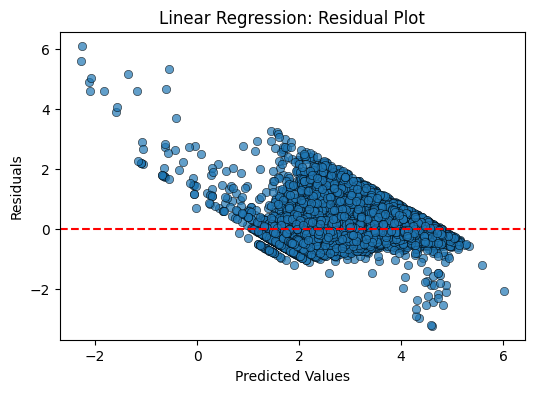

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=lin_y_pred, y=lin_residuals, edgecolor='k', alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Linear Regression: Residual Plot')

The residuals show a clear pattern that suggests that the linear regression model is not able to capture the possible non-linear relationship.

### k-Nearest Neighbors (kNN)

We first load relevant libraries again.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

To search for best k, we loop over different k-values in search for the one minimizing MSE the most.

In [ ]:
# Defining the k_range to be from 1 to 20
k_range = range(1, 21)

# Initializing lists to store k-values and corresponding MSE scores
k_values = []
mse_scores = []

# Initializing best_score and best_k
# The reason behind setting best_score to infinity is to ensure that the first score we compute is guaranteed to be the new best one
best_score = float('inf')
best_k = None

# Loop over the range of k values to find best_k
for k in k_range:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    score = mean_squared_error(y_test, y_pred)

    # Store k and the corresponding MSE
    k_values.append(k)
    mse_scores.append(score)

    if score < best_score:
        best_score = score
        best_k = k

Let us visualize KNN performance against different k-values, then print out the best k found based on the lowest MSE.

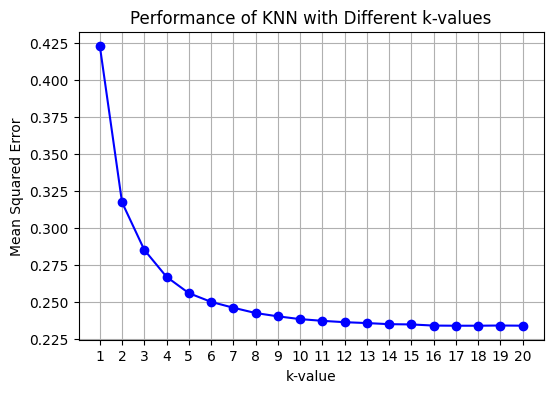

Best k: 17 with Mean Squared Error: 0.2337733754060948


In [ ]:
# Plot the performance of different k values
plt.figure(figsize=(6,4))
plt.plot(k_values, mse_scores, marker='o', linestyle='-', color='b')
plt.xlabel('k-value')
plt.ylabel('Mean Squared Error')
plt.title('Performance of KNN with Different k-values')
plt.xticks(k_values)  # Ensure all k values are shown on the x-axis
plt.grid(True)
plt.show()

print(f'Best k: {best_k} with Mean Squared Error: {best_score}')

**NOTE**: The blocks above were also ran but using RMSE as a metric instead of MSE, and both MSE and RMSE result to a k-value of 17 being optimal.

Now training the KNN model using optimal k found, k = 17.

In [ ]:
knn = KNeighborsRegressor(n_neighbors = 17)
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=17)

Then, we test KNN predictions against the test set.

In [ ]:
knn_y_pred = knn.predict(X_test_scaled)

Here is where we assess performance through the same 2 metrics: MSE, RMSE, plus 2 other metrics: MAE, and R-squared value.

In [ ]:
knn_mse = mean_squared_error(y_test, knn_y_pred)
knn_rmse = mean_squared_error(y_test, knn_y_pred, squared=False)
knn_mae = mean_absolute_error(y_test, knn_y_pred)
knn_r2 = r2_score(y_test, knn_y_pred)

print(f'Mean Squared Error: {knn_mse}')
print(f'Root Mean Squared Error (RMSE): {knn_rmse}')
print(f'Mean Absolute Error (MAE): {knn_mae}')
print(f'R-squared: {knn_r2}')

Mean Squared Error: 0.2337733754060948
Root Mean Squared Error (RMSE): 0.4835011638104864
Mean Absolute Error (MAE): 0.3421546361870365
R-squared: 0.7184790940070431


To visualize the model better, let us create a scatterplot of actual vs. predicted for KNN.

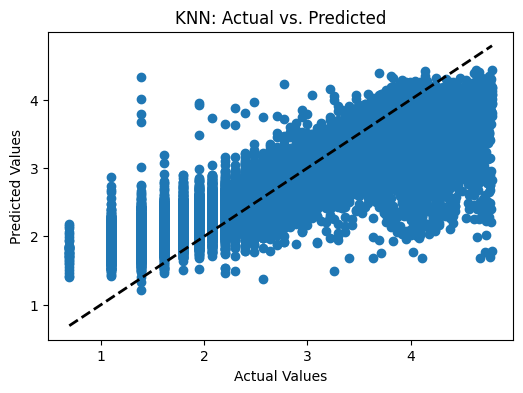

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, knn_y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('KNN: Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

Let us also try to create another version of a scatterplot, a residual plot.

In [ ]:
knn_residuals = y_test - knn_y_pred

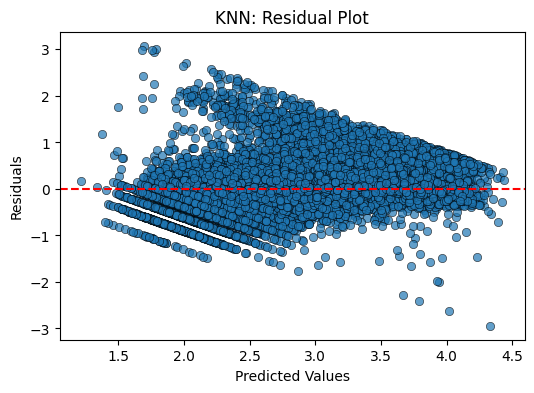

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=knn_y_pred, y=knn_residuals, edgecolor='k', alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('KNN: Residual Plot')
plt.show()

### Random Forest

We also use Random Forest to try to capture potential non-linear relationships that exist between the features and the target variable.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

We initialized a Random Forest Regressor with specified hyperparameters to ensure that it is not too computationally costly. Then, it is trained on the scaled training data with the target value.

In [ ]:
rf_regr = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    max_features='sqrt',
    min_samples_split=10,
    min_samples_leaf=4,
    n_jobs=-1,
    random_state=42)
rf_regr.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_jobs=-1, random_state=42)

This uses the trained Random Forest model to predict the target values for the scaled test data (X_test_scaled).

In [ ]:
rf_y_pred = rf_regr.predict(X_test_scaled)

The model performance is evaluated by calculating the Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R-sequared metrics.


In [ ]:
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_rmse = mean_squared_error(y_test, rf_y_pred, squared=False)
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

print(f'Mean Squared Error (MSE): {rf_mse}')
print(f'Root Mean Squared Error (RMSE): {rf_rmse}')
print(f'Mean Absolute Error (MAE): {rf_mae}')
print(f'R-squared: {rf_r2}')

Mean Squared Error (MSE): 0.22848624642451518
Root Mean Squared Error (RMSE): 0.47800234981066275
Mean Absolute Error (MAE): 0.3591889945803147
R-squared: 0.7248461036736071


Below, we create a scatterplot that will show the predicted values against the actual values to assess the performance of the model.

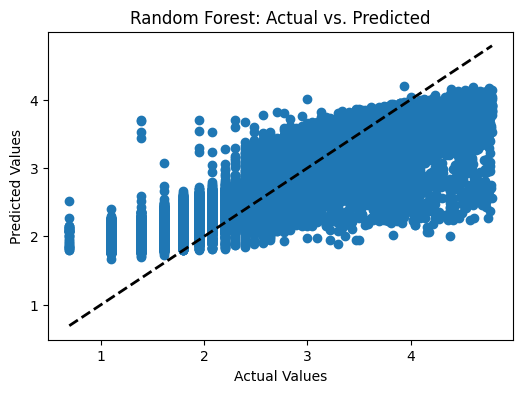

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, rf_y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest: Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

A residual plot is also created to further examine whether the model was able to capture the presence of a non-linear relationship, especially when compared to previous models used.

In [ ]:
rf_residuals = y_test - rf_y_pred

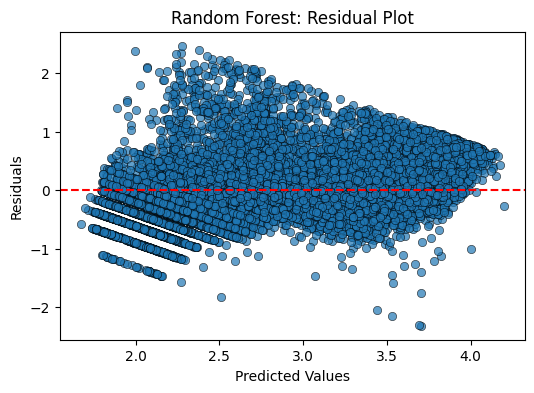

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=rf_y_pred, y=rf_residuals, edgecolor='k', alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Random Forest: Residual Plot')
plt.show()

### XGBoost Regressor

We first loading relevant libraries for XGBoost.

In [ ]:
!pip install xgboost
import xgboost
from xgboost import XGBRegressor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 4.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requ

Here, we initialize and train the XGBoost model.

In [ ]:
xgb = XGBRegressor()
xgb.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Then, we use testing prediction performace against the test set (unseen data).

In [ ]:
xgb_y_pred = xgb.predict(X_test_scaled)

From here, we can compute evaluation metrics for the model.

In [ ]:
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_rmse = mean_squared_error(y_test, xgb_y_pred, squared=False)
xgb_mae = mean_absolute_error(y_test, xgb_y_pred)
xgb_r2 = r2_score(y_test, xgb_y_pred)

print(f'Mean Squared Error: {xgb_mse}')
print(f'Root Mean Squared Error (RMSE): {xgb_rmse}')
print(f'Mean Absolute Error (MAE): {xgb_mae}')
print(f'R-squared: {xgb_r2}')

Mean Squared Error: 0.04124834337836821
Root Mean Squared Error (RMSE): 0.2030968817544184
Mean Absolute Error (MAE): 0.12726289286243767
R-squared: 0.9503268027061902


To visualize the model's performance, below is a scatterplot of actual vs. predicted for XGB. It can be seen that the points are quite near to the best-fit line.

Text(0.5, 1.0, 'XGBoost: Actual vs. Predicted')

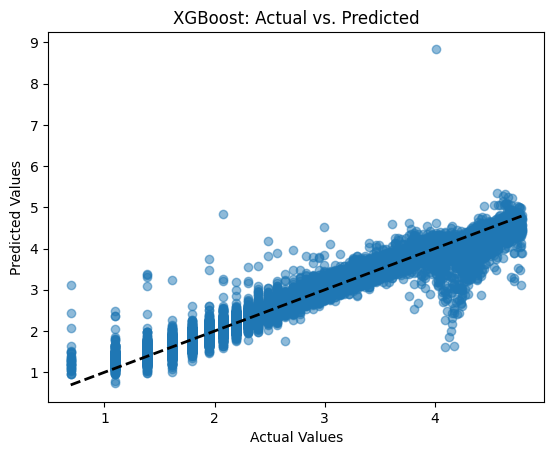

In [ ]:
plt.scatter(y_test, xgb_y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('XGBoost: Actual vs. Predicted')

Lastly, we also create a residual plot for XGB.

In [ ]:
xgb_residuals = y_test - xgb_y_pred

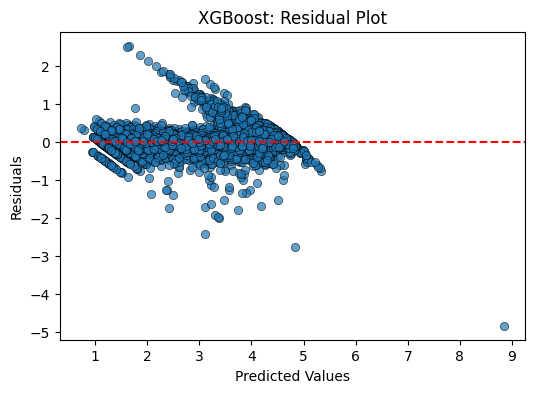

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=xgb_y_pred, y=xgb_residuals, edgecolor='k', alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('XGBoost: Residual Plot')
plt.show()

## Model Comparison

Here, we summarize the performance metrics for each of the 4 models.

In [ ]:
metrics = {
    'Model': ['Linear Regression', 'K-Nearest Neighbors', 'Random Forest', 'XGBoost'],
    'Mean Squared Error (MSE)': [lin_mse, knn_mse, rf_mse, xgb_mse],
    'Root Mean Squared Error (RMSE)': [lin_rmse, knn_rmse, rf_rmse, xgb_rmse],
    'Mean Absolute Error (MAE)': [lin_mae, knn_mae, rf_mae, xgb_mae],
    'R-squared': [lin_r2, knn_r2, rf_r2, xgb_r2]
}

metrics_df = pd.DataFrame(metrics)

metrics_df

,Model,Mean Squared Error (MSE),Root Mean Squared Error (RMSE),Mean Absolute Error (MAE),R-squared
0,Linear Regression,0.231668,0.481319,0.333434,0.721014
1,K-Nearest Neighbors,0.233773,0.483501,0.342155,0.718479
2,Random Forest,0.228486,0.478002,0.359189,0.724846
3,XGBoost,0.041248,0.203097,0.127263,0.950327


Based on the output above, the XGBoost Model resulted in the highest R-squared value of 95.03% and lowest MSE at 0.0412, lowest RMSE at 0.2031, and lowest MAE at 0.1273, indicating that this is the best model among the 4, having a really good performance. The metrics for the 3 other models, namely Linear Regression, K-Nearest Neighbors, and Random Forest, are near each other. The 2nd best model is Random Forest with an R-squared of 72.48% and MSE of 0.2285, followed by the Linear Regression Model with R-squared of 72.10% and MSE of 0.2317, then lastly, the KNN Model with R-squared of 71.85% and MSE of 23.38. While lower than the XGBoost Model's, the R-squared values of the other 3 models can still be considered relatively good as they exceed at least 70%.

We also use cross-validation to see how well the models perform on other train-test split of the data.

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# Perform cross-validation and collect results
lin_cv_scores = cross_val_score(lin_regr, X, y, cv=5, scoring='r2')
knn_cv_scores = cross_val_score(knn, X, y, cv=5, scoring='r2')
rf_cv_scores = cross_val_score(rf_regr, X, y, cv=5, scoring='r2')
xgb_cv_scores = cross_val_score(xgb, X, y, cv=5, scoring='r2')

In [ ]:
# Collect the results in a dictionary
cv_results = {
    'Model': ['Linear Regression', 'K-Nearest Neighbors', 'Random Forest', 'XGBoost'],
    'Mean R²': [np.mean(lin_cv_scores), np.mean(knn_cv_scores), np.mean(rf_cv_scores), np.mean(xgb_cv_scores)],
    'Standard Deviation': [np.std(lin_cv_scores), np.std(knn_cv_scores), np.std(rf_cv_scores), np.std(xgb_cv_scores)]
}

# Create a DataFrame
cv_results_df = pd.DataFrame(cv_results)

# Round the results for better readability
cv_results_df = cv_results_df.round(4)

# Display the DataFrame
cv_results_df

,Model,Mean R²,Standard Deviation
0,Linear Regression,0.7134,0.0052
1,K-Nearest Neighbors,0.3011,0.0043
2,Random Forest,0.7365,0.0030
3,XGBoost,0.9513,0.0016


The performance metrics for both the train-test split and cross-validation reveal key insights about the models. Linear Regression and Random Forest show solid R-squared values around 0.72 to 0.73 on the test split, indicating good fit, with Random Forest slightly outperforming Linear Regression. However, their cross-validation scores suggest some variability, especially for K-Nearest Neighbors (KNN), which exhibits a low R-squared around 0.30, implying it's not capturing the underlying patterns effectively.

Interestingly, KNN showed a relatively good R-squared of 0.718 on the test split, but its cross-validation scores reveal a significant drop. This discrepancy suggests that KNN might be overfitting to the training data or the specific test split, capturing noise rather than the underlying signal. KNN's performance heavily depends on the distance metrics and the choice of neighbors, and it can struggle with high-dimensional data, leading to inconsistency across different data folds in cross-validation.

XGBoost stands out with an exceptional performance, achieving an R-squared of 0.95 on both the test split and cross-validation, suggesting it generalizes well and provides consistent results. The superior performance of XGBoost, reflected in lower MSE and RMSE, highlights its robustness and ability to handle complex relationships within the data, making it the most reliable model among those evaluated.

### Feature Importance Plot

To interpret the outcomes of the XGBoost model, we will be using a Feature Importance plot to understand how the model makes predictions and which of the features are the most influential to the model's outcomes.

In [ ]:
importance_dict = xgb.get_booster().get_score(importance_type='weight')
importance_df = pd.DataFrame(importance_dict.items(), columns=['Feature', 'Importance'])
importance_df = importance_df.sort_values(by='Importance', ascending=False)

In [ ]:
feature_names = {f'f{i}': feature for i, feature in enumerate(features)}
importance_df['Feature'] = importance_df['Feature'].map(feature_names)

In [ ]:
importance_df.dropna(inplace=True)

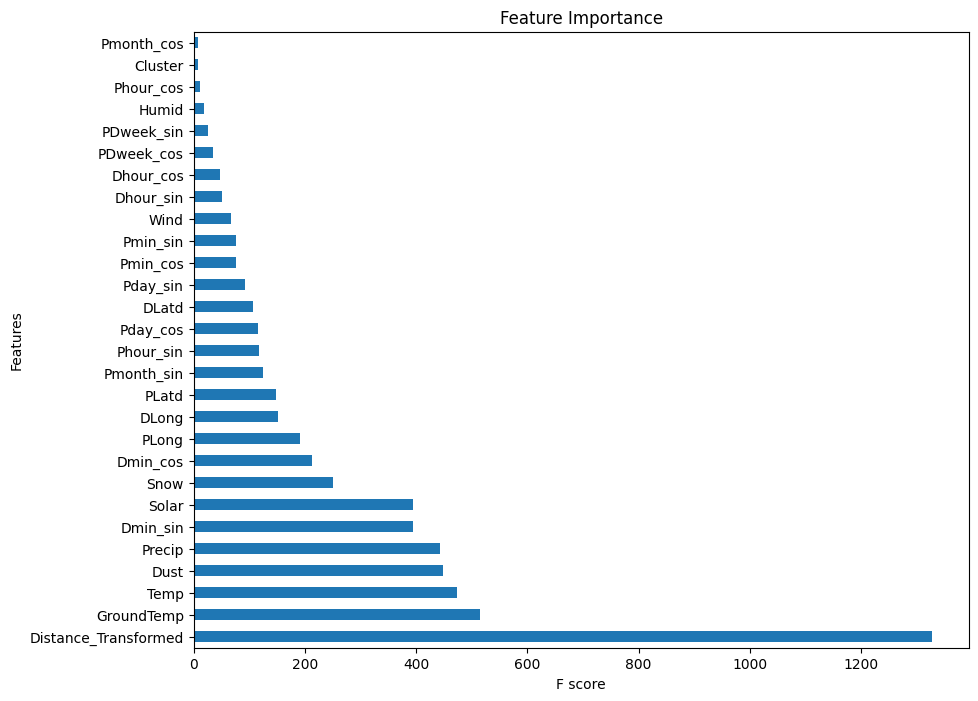

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
importance_df.plot(kind='barh', x='Feature', y='Importance', ax=ax, legend=False)
ax.set_title('Feature Importance')
ax.set_xlabel('F score')
ax.set_ylabel('Features')
plt.show()

Evidently, `Distance_ Transformed` is the most important feature in predicting bike trip duration, which verifies what was previously observed in descriptive statistics.
> In that, the longer the distance of the bike trip, the longer the duration.

For future reference, this can also be used in feature selection by reducing the least important features to the model in order to reduce the dimensionality of the dataset and decrease computational costs and the likelihood of overfitting.

References:
*   3.4. Metrics and scoring: quantifying the quality of predictions. (2015). Scikit-Learn. https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics‌
*   Biswal, A. (2023, April 3). Sklearn Linear Regression. Simplilearn.com; Simplilearn. https://www.simplilearn.com/tutorials/scikit-learn-tutorial/sklearn-linear-regression-with-examples#evaluating_the_model
* GeeksforGeeks. (2019, May 23). Python Linear Regression using sklearn. GeeksforGeeks; GeeksforGeeks. https://www.geeksforgeeks.org/python-linear-regression-using-sklearn/
* How to determine the optimal number of clusters: scree plots and the elbow method. (n.d.). FutureLearn. https://www.futurelearn.com/info/courses/data-analytics-for-managers/0/steps/315594
* Lewinson, E. (2022, February 17). Three Approaches to Encoding Time Information as Features for ML Models. NVIDIA Technical Blog. https://developer.nvidia.com/blog/three-approaches-to-encoding-time-information-as-features-for-ml-models/
* Mangale, S. (2020, August 28). Scree Plot. Medium. https://sanchitamangale12.medium.com/scree-plot-733ed72c8608
* Mindful Modeler. (2023, May 5). Feature selection or feature importance? Substack. https://mindfulmodeler.substack.com/p/feature-selection-or-feature-importance
* Suhail, A. (2023, July 25). From Noise to Knowledge: Mastering Exploratory Data Analysis and Outlier Detection. Medium; Tensor Labs. https://medium.com/tensor-labs/from-noise-to-knowledge-mastering-exploratory-data-analysis-and-outlier-detection-f07a8eb8cf42
* Reinecke, T. (2023, May 30). #TuesdayEDA: Handling Outliers in Exploratory Data Analysis. Linkedin.com. https://www.linkedin.com/pulse/tuesdayeda-handling-outliers-exploratory-data-thomas-reinecke


